# Interpretation

The notebook shows some of the functionality of the [bw2analyzer](https://bitbucket.org/cmutel/brightway2-analyzer) library.

In [1]:
import brightway2 as bw
import bw2analyzer as bwa
import pyprind
import seaborn as sns
import numpy as np

In [2]:
bw.projects.set_current("bw2_seminar_2017")

Let's get inventory and a characterized inventory matrices, and make sure we have an LCIA score to interpret!

In [3]:
lca = bw.LCA({bw.Database('ecoinvent 2.2').random(): 1}, bw.methods.random())
lca.lci()
lca.lcia()
lca.score

2.8593115187294715e-06

# Contribution analysis

Find the most damaging activities and biosphere flows.

`annotated_top_processes` will return a list of tuples: ``(lca score, supply amount, activity name)``.

In [7]:
ca = bwa.ContributionAnalysis()
ca.annotated_top_processes(lca, limit=5)

[(9.3810605930017971e-07,
  0.0045117285323671673,
  'disposal, spoil from lignite mining, in surface landfill'),
 (3.1967657767072742e-07,
  0.00064133472612925039,
  'disposal, sulfidic tailings, off-site'),
 (3.1706373266437574e-07,
  0.0015248916867370685,
  'disposal, spoil from coal mining, in surface landfill'),
 (6.1953864675742778e-08,
  8.2283813388803355e-06,
  'disposal, basic oxygen furnace wastes, 0% water, to residual material landfill'),
 (1.750996182559192e-08,
  3.5019921987826802e-05,
  'disposal, drilling waste, 71.5% water, to landfarming')]

We can also set a limit below one, which will filter by fraction of impact instead of number of activities; we can also return activity *keys* instead of names.

In [11]:
ca = bwa.ContributionAnalysis()
ca.annotated_top_processes(lca, names=False, limit=0.02, limit_type='percent')

[(9.3810605930017971e-07,
  0.0045117285323671673,
  ('ecoinvent 2.2', 'e83447d32f973de917f154987757cc45')),
 (3.1967657767072742e-07,
  0.00064133472612925039,
  ('ecoinvent 2.2', 'c48c57042671633b56b5961a01e1a6fa')),
 (3.1706373266437574e-07,
  0.0015248916867370685,
  ('ecoinvent 2.2', '0cb0ac4b161eaa5949676f0f9e45da7d')),
 (6.1953864675742778e-08,
  8.2283813388803355e-06,
  ('ecoinvent 2.2', '5d60becbf3af539554c108613ed5069b'))]

And of course we can do the same for elementary flows:

In [14]:
ca = bwa.ContributionAnalysis()
ca.annotated_top_emissions(lca, limit=0.02, limit_type='percent')

[(1.3986810701191055e-06, 4.2384273167894427e-06, 'Phosphate'),
 (2.6368246720063822e-07, 7.9903774764496616e-07, 'Phosphate')]

In addition to contribution analysis, we can also look at individual activities (columns) or flows (rows); you (should have) learned to do this already :)

What is we want to group names together, i.e. to get the total impact for all "phosphates"? There isn't a built-in function for this, but it is relatively easy to do.

In [19]:
from collections import defaultdict

all_unique_names_and_their_keys = defaultdict(list)

for flow in bw.Database("biosphere3"):
    if flow.key in lca.biosphere_dict:
        all_unique_names_and_their_keys[flow['name']].append(flow.key)
    
all_unique_names_and_their_keys

defaultdict(list,
            {'1,4-Butanediol': [('biosphere3',
               'd6911d36-3fec-41fe-8ef9-540f6543a240'),
              ('biosphere3', '38a622c6-f086-4763-a952-7c6b3b1c42ba')],
             '1-Pentanol': [('biosphere3',
               'e4526360-b2a1-4e77-9f00-57dbfe228bde'),
              ('biosphere3', '541a823c-0aad-4dc4-9123-d4af4647d942')],
             '1-Pentene': [('biosphere3',
               '8cbaa905-41b0-4327-8403-bf1c8eb25429'),
              ('biosphere3', 'f3cf9958-739f-41c1-a679-f550cf0e9b6c')],
             '2,4-D': [('biosphere3', 'f681eb3c-854a-4f78-bcfe-76dfbcf9df3c')],
             '2-Aminopropanol': [('biosphere3',
               '96db42b8-64e4-4a84-9b16-cd8f73c615d6'),
              ('biosphere3', 'a0fec60d-3f74-48bf-a2d2-58c30fc13e53')],
             '2-Methyl pentane': [('biosphere3',
               'd5649872-502b-4d23-b882-26d74a9fc4b4')],
             '2-Methyl-1-propanol': [('biosphere3',
               '79240a49-80cf-4be4-b5c2-bfdd3f4aa249'),


In [20]:
all_unique_names_and_their_rows = {
    name: [lca.biosphere_dict[key] for key in keys] 
    for name, keys in all_unique_names_and_their_keys.items()
}

all_unique_names_and_their_rows

{'1,4-Butanediol': [1122, 0],
 '1-Pentanol': [1123, 1],
 '1-Pentene': [2, 1124],
 '2,4-D': [3],
 '2-Aminopropanol': [1125, 4],
 '2-Methyl pentane': [5],
 '2-Methyl-1-propanol': [1126, 6],
 '2-Methyl-2-butene': [1127, 7],
 '2-Nitrobenzoic acid': [8],
 '2-Propanol': [1128, 9],
 '3-Methyl-1-butanol': [10, 1129],
 '4-Methyl-2-pentanol': [1130],
 '4-Methyl-2-pentanone': [11, 1131, 1132],
 'AOX, Adsorbable Organic Halogen as Cl': [1166, 1165, 1164],
 'Abamectin': [12],
 'Acenaphthene': [1134, 686, 13, 687, 1133],
 'Acenaphthylene': [1135, 1136],
 'Acephate': [14],
 'Acetaldehyde': [689, 688, 15, 1137],
 'Acetamide': [16],
 'Acetic acid': [1138, 691, 17, 690],
 'Acetochlor': [18],
 'Acetone': [19, 1139, 693, 1140, 692],
 'Acetonitrile': [1141, 694],
 'Acetyl chloride': [1142],
 'Acidity, unspecified': [1143, 1144],
 'Aclonifen': [20],
 'Acrolein': [696, 21, 695],
 'Acrylate, ion': [1145],
 'Acrylic acid': [22],
 'Actinides, radioactive, unspecified': [1146, 697],
 'Aerosols, radioactive, unsp

In [23]:
all_unique_names_and_their_scores = {
    name: [lca.characterized_inventory[row, :].sum() for row in rows]
    for name, rows in all_unique_names_and_their_rows.items()
}

all_unique_names_and_their_scores

{'1,4-Butanediol': [0.0, 0.0],
 '1-Pentanol': [0.0, 0.0],
 '1-Pentene': [0.0, 0.0],
 '2,4-D': [0.0],
 '2-Aminopropanol': [0.0, 0.0],
 '2-Methyl pentane': [0.0],
 '2-Methyl-1-propanol': [0.0, 0.0],
 '2-Methyl-2-butene': [0.0, 0.0],
 '2-Nitrobenzoic acid': [0.0],
 '2-Propanol': [0.0, 0.0],
 '3-Methyl-1-butanol': [0.0, 0.0],
 '4-Methyl-2-pentanol': [0.0],
 '4-Methyl-2-pentanone': [0.0, 0.0, 0.0],
 'AOX, Adsorbable Organic Halogen as Cl': [0.0, 0.0, 0.0],
 'Abamectin': [0.0],
 'Acenaphthene': [0.0, 0.0, 0.0, 0.0, 0.0],
 'Acenaphthylene': [0.0, 0.0],
 'Acephate': [0.0],
 'Acetaldehyde': [0.0, 0.0, 0.0, 0.0],
 'Acetamide': [0.0],
 'Acetic acid': [0.0, 0.0, 0.0, 0.0],
 'Acetochlor': [0.0],
 'Acetone': [0.0, 0.0, 0.0, 0.0, 0.0],
 'Acetonitrile': [0.0, 0.0],
 'Acetyl chloride': [0.0],
 'Acidity, unspecified': [0.0, 0.0],
 'Aclonifen': [0.0],
 'Acrolein': [0.0, 0.0, 0.0],
 'Acrylate, ion': [0.0],
 'Acrylic acid': [0.0],
 'Actinides, radioactive, unspecified': [0.0, 0.0],
 'Aerosols, radioactive,

Now I am going to switch the order, from `name, rows` to `total scores, name`, because I want to sort by the impact. I will also ignore zeros, as they are uninteresting in this context.

By default, sorting will be smallest number first, so we say `reverse=True` to get highest number first.

In [24]:
sorted_scores = sorted(
    [(sum(scores), name) for name, scores in all_unique_names_and_their_scores.items()], 
    reverse=True
)

sorted_scores[:10]

[(1.6658178150790866e-06, 'Phosphate'),
 (2.1692125865890793e-08, 'Phosphorus'),
 (0.0, 't-Butylamine'),
 (0.0, 't-Butyl methyl ether'),
 (0.0, 'o-Xylene'),
 (0.0, 'o-Nitrotoluene'),
 (0.0, 'o-Dichlorobenzene'),
 (0.0, 'm-Xylene'),
 (0.0, 'Zirconium-95'),
 (0.0, 'Zirconium, 50% in zircon, 0.39% in crude ore, in ground')]

We can also encapsulate all this functionality in a single function (which should be added to `bw2analyzer`!)

In [26]:
from collections import defaultdict

def top_emissions_by_name(lca, biosphere_database='biosphere3'):
    names = defaultdict(list)

    for flow in bw.Database("biosphere3"):
        if flow.key in lca.biosphere_dict:
            names[flow['name']].append(
                lca.characterized_inventory[lca.biosphere_dict[flow.key], :].sum()
            )
    
    return sorted(
        [(sum(scores), name) for name, scores in names.items()], 
        reverse=True
    )

In [28]:
top_emissions_by_name(lca)[:5]

[(1.6658178150790868e-06, 'Phosphate'),
 (2.1692125865890789e-08, 'Phosphorus'),
 (0.0, 't-Butylamine'),
 (0.0, 't-Butyl methyl ether'),
 (0.0, 'o-Xylene')]

# Graph the technosphere matrix

In [4]:
%matplotlib inline

In [30]:
from bw2analyzer.matrix_grapher import SparseMatrixGrapher

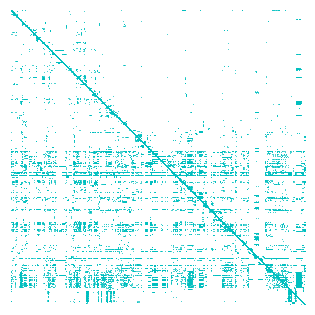

In [31]:
SparseMatrixGrapher(lca.technosphere_matrix).graph()

Try to do this as well for the biosphere matrix and characterization matrix.

We can also change the way the rows are ordered to be prettier:

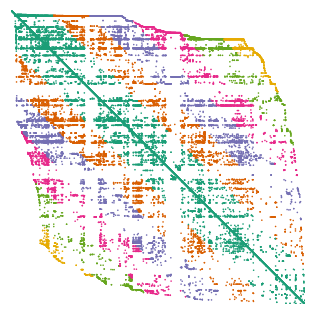

In [33]:
SparseMatrixGrapher(lca.technosphere_matrix).ordered_graph()

# Econometric indicators

`bw2analyzer` provides the [Gini coefficient](https://en.wikipedia.org/wiki/Gini_coefficient), [Herfindahl index](https://en.wikipedia.org/wiki/Herfindahl_index), [Theil index](https://en.wikipedia.org/wiki/Herfindahl_index), and [Concentration ratio](https://en.wikipedia.org/wiki/Concentration_ratio).

These indices can be applied to any matrix, or subsection of a matrix. Let's consider the Gini coefficent for all elements in the characterized inventory matrix. We will filter to only consider non-zero values.

In [5]:
all_values_in_characterized_inventory = lca.characterized_inventory.data
all_values_in_characterized_inventory

array([  2.02449224e-14,   5.20175516e-19,   4.55246152e-19, ...,
         3.06197623e-17,   4.22820453e-14,   3.81900103e-11])

In [6]:
non_zero_values = all_values_in_characterized_inventory != 0
non_zero_values

array([ True,  True,  True, ...,  True,  True,  True], dtype=bool)

In [7]:
bwa.econ.gini_coefficient(all_values_in_characterized_inventory[non_zero_values])

0.9973540255754139

This is quite typical in LCA, as most activities and flows do not contribute to a given impact category, either because they are not characterized, or because the activities have no biosphere flows at all.

Let's also calculate our other econometric indices:

In [8]:
data = all_values_in_characterized_inventory[non_zero_values]

bwa.econ.herfindahl_index(data), bwa.econ.theil_index(data), bwa.econ.concentration_ratio(data)

(0.0756687456188445, 6.247553604986408, 0.47987654454607576)

Not much we can learn from that... what about if we examine everything in ecoinvent?

In [5]:
index_scores = {
    'gini': [],
    'concentration': [],
    'theil': [],
    'herfindahl': []
}

for act in pyprind.prog_bar(bw.Database("ecoinvent 2.2")):
    lca.redo_lcia({act: 1})
    data = lca.characterized_inventory.data[lca.characterized_inventory.data != 0]
    if not data.shape[0]:
        continue
    index_scores['gini'].append(bwa.econ.gini_coefficient(data))
    index_scores['concentration'].append(bwa.econ.concentration_ratio(data))
    index_scores['theil'].append(bwa.econ.theil_index(data))
    index_scores['herfindahl'].append(bwa.econ.herfindahl_index(data))    

0%                          100%
[##############################] | ETA: 00:00:00
Total time elapsed: 00:00:16


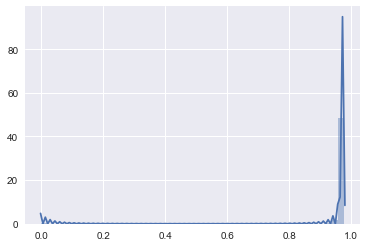

In [6]:
sns.distplot(index_scores['gini'])

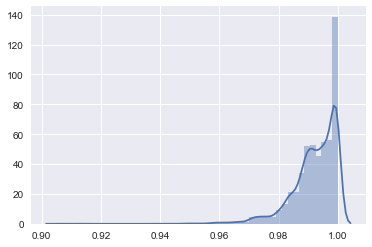

In [7]:
sns.distplot(index_scores['concentration'])

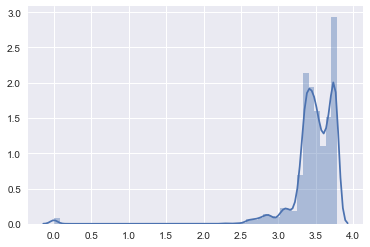

In [8]:
sns.distplot(index_scores['theil'])

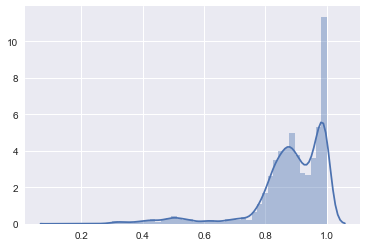

In [13]:
scores = np.array(index_scores['herfindahl'])
filtered_herfindahl = scores[scores > 0]

sns.distplot(filtered_herfindahl)